# 최대우도추정 (Maximum Likelihood Estimation, MLE)

**최대우도추정(MLE)**은 주어진 데이터가 특정 확률 분포 모델로부터 나왔을 **가능성(우도, Likelihood)**을 최대로 만드는 **모수(parameter)**를 찾는 방법임.

다시 말해, 관측된 데이터 집합을 가장 '그럴듯하게' 설명하는 모델의 파라미터를 추정하는 통계적 접근법임. 통계학 및 머신러닝에서 모델을 데이터에 적합시키는(fitting) 핵심 원리로 널리 사용됨.

### 수학적 배경 📐
MLE의 목표는 우도 함수(Likelihood Function)를 최대로 만드는 모수 $\theta$를 찾는 것임.

1.  **우도 함수 (Likelihood Function)**: $n$개의 독립적인 데이터 포인트 $x = (x_1, ..., x_n)$가 주어졌을 때, 모수 $\theta$에 대한 우도 함수는 각 데이터 포인트의 확률(밀도) 함수의 곱으로 정의됨.
    $$ L(\theta | x) = P(x | \theta) = \prod_{i=1}^{n} P(x_i | \theta) $$

2.  **로그 우도 함수 (Log-Likelihood Function)**: 여러 확률의 곱은 매우 작아져 컴퓨터 계산 시 수치적 불안정성(numerical underflow)을 유발할 수 있음. 또한, 곱셈보다 덧셈이 미분에 용이하므로, 우도 함수에 로그를 취한 로그 우도 함수를 사용하는 것이 일반적임. 로그는 단조 증가 함수이므로, 로그 우도를 최대로 만드는 $\theta$는 원래의 우도를 최대로 만드는 $\theta$와 동일함.
    $$ l(\theta | x) = \log L(\theta | x) = \sum_{i=1}^{n} \log P(x_i | \theta) $$

3.  **최대화 (Maximization)**: 로그 우도 함수를 $\theta$에 대해 미분하여 그 값이 0이 되는 지점을 찾아 $\theta$의 최대우도추정량(MLE) $\hat{\theta}_{MLE}$를 구함.
    $$ \frac{d l(\theta)}{d\theta} = 0 $$

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### 예제 데이터 준비 (Data Preparation)
정규분포를 따르는 데이터를 인위적으로 생성하여 MLE 과정을 시연함. 여기서 우리는 데이터가 정규분포를 따른다는 사실은 알지만, 그 평균($\mu$)은 모른다고 가정함. MLE를 통해 이 미지의 평균을 추정하는 것이 목표임.

데이터 형태(shape): (100,)
데이터 일부: [10.99342831  9.7234714  11.29537708 13.04605971  9.53169325]



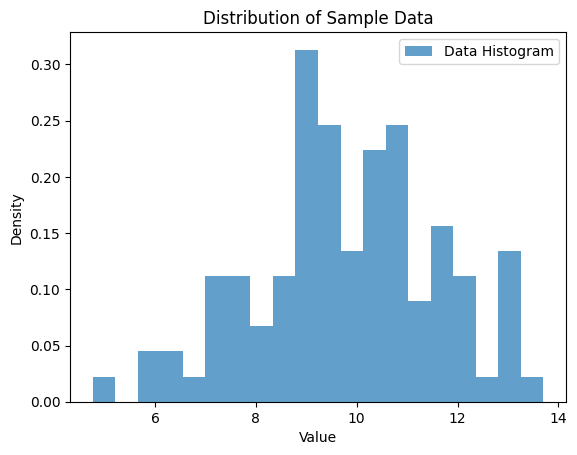

In [2]:
# 실제 모수 설정 (우리가 추정하고자 하는 값)
true_mu = 10
true_sigma = 2
n_samples = 100

# 정규분포로부터 데이터 샘플링
np.random.seed(42)
data = np.random.normal(loc=true_mu, scale=true_sigma, size=n_samples)

print(f"데이터 형태(shape): {data.shape}")
print(f"데이터 일부: {data[:5]}\n")

# 데이터 분포 시각화
plt.hist(data, bins=20, density=True, alpha=0.7, label='Data Histogram')
plt.title('Distribution of Sample Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### 핵심 로직 구현 (Code Implementation)
정규분포의 평균($\mu$)에 대한 로그 우도 함수를 정의하고, 어떤 $\mu$ 값이 이 함수를 최대로 만드는지 탐색함. 정규분포의 확률 밀도 함수(PDF)는 $P(x | \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$ 임.

In [3]:
# 단계 1: 로그 우도 함수 정의
# 이 예제에서는 표준편차(sigma)는 2로 알고 있다고 가정함.
def log_likelihood_normal(mu, sigma, data):
    # 각 데이터 포인트에 대한 로그 확률밀도 계산
    log_probs = norm.logpdf(data, loc=mu, scale=sigma)
    # 로그 확률들의 합을 반환 (로그 우도)
    return np.sum(log_probs)

# 단계 2: 다양한 후보 mu 값에 대한 로그 우도 계산
mu_candidates = np.linspace(5, 15, 200) # mu 후보군 생성
log_likelihoods = [log_likelihood_normal(mu, true_sigma, data) for mu in mu_candidates]

print("다양한 mu 후보에 대한 로그 우도 계산 완료.")

다양한 mu 후보에 대한 로그 우도 계산 완료.


In [4]:
# 단계 3: 로그 우도를 최대로 만드는 mu 찾기

# 수치적 방법: 계산된 로그 우도 값들 중 최댓값의 인덱스를 찾음
max_likelihood_idx = np.argmax(log_likelihoods)
mle_mu_numerical = mu_candidates[max_likelihood_idx]

# 해석적 방법: 정규분포의 평균에 대한 MLE는 표본 평균(sample mean)과 동일함
mle_mu_analytical = np.mean(data)

print(f"수치적으로 찾은 MLE(mu): {mle_mu_numerical:.4f}")
print(f"해석적으로 계산된 MLE(mu) (표본 평균): {mle_mu_analytical:.4f}")
print(f"실제 mu 값: {true_mu}")

수치적으로 찾은 MLE(mu): 9.7739
해석적으로 계산된 MLE(mu) (표본 평균): 9.7923
실제 mu 값: 10


### 결과 확인 및 시각화 (Results & Visualization) 📊
$\mu$ 값의 변화에 따른 로그 우도 함수의 변화를 시각화하여, 우도가 최대가 되는 지점을 확인함.

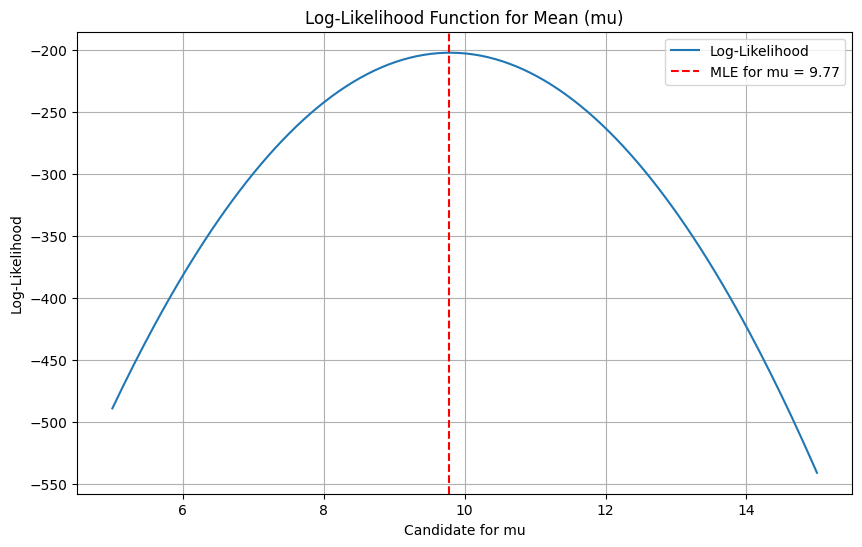

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(mu_candidates, log_likelihoods, label='Log-Likelihood')

# 로그 우도가 최대인 지점을 표시
plt.axvline(mle_mu_numerical, color='r', linestyle='--', label=f'MLE for mu = {mle_mu_numerical:.2f}')

plt.title('Log-Likelihood Function for Mean (mu)')
plt.xlabel('Candidate for mu')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()

### 고려사항 (Considerations)
- **해석적 해 vs 수치적 해**: 정규분포의 평균처럼 MLE가 표본 평균과 같이 간단한 공식(해석적 해)으로 존재하는 경우가 많음. 하지만 모델이 복잡해지면 미분으로 해를 구하기 어려워, 경사 하강법(Gradient Descent)과 같은 수치적 최적화 기법을 사용해 해를 찾아야 함.
- **모델 가정의 중요성**: MLE는 데이터가 특정 확률 분포를 따른다고 가정한 상태에서 최적의 모수를 찾음. 만약 모델 가정이 데이터의 실제 분포와 크게 다르면, 추정된 모수는 신뢰하기 어려움.
- **점 추정의 한계**: MLE는 모수에 대한 단일 값(점 추정)을 제공함. 이 추정치가 얼마나 불확실한지에 대한 정보는 제공하지 않음. 이러한 불확실성은 신뢰 구간(Confidence Interval)이나 베이즈 추정(Bayesian Estimation)을 통해 보완할 수 있음.

### 최종 요약 (Conclusion)
본 노트북에서는 최대우도추정(MLE)의 원리를 이해하고, 정규분포를 따르는 데이터의 평균을 추정하는 예제를 직접 구현하였음.

로그 우도 함수를 정의하고, 이 함수의 값을 최대로 만드는 모수($\mu$)를 탐색함으로써 주어진 데이터를 가장 잘 설명하는 값을 찾을 수 있었음. 시각화를 통해 로그 우도 함수가 특정 지점에서 최댓값을 갖는 것을 명확히 확인하였고, 이 지점이 데이터의 표본 평균과 일치함을 보였음. 이는 MLE가 통계적으로 타당할 뿐만 아니라 직관적으로도 합리적인 추정 방법임을 보여줌.